In [311]:
'''
Assignment 3: Student Performance Prediction
Dataset: Student Performance
Link: https://raw.githubusercontent.com/selva86/datasets/master/StudentPerformance.csv
Task:
 Predict student final grade category.
 Handle missing values.
 Label encode categorical columns (school, sex, etc.).
 Apply StandardScaler.
 Train KNN and compute accuracy, classification report.


'''

'\nAssignment 3: Student Performance Prediction\nDataset: Student Performance\nLink: https://raw.githubusercontent.com/selva86/datasets/master/StudentPerformance.csv\nTask:\n\uf0b7 Predict student final grade category.\n\uf0b7 Handle missing values.\n\uf0b7 Label encode categorical columns (school, sex, etc.).\n\uf0b7 Apply StandardScaler.\n\uf0b7 Train KNN and compute accuracy, classification report.\n\n\n'

In [312]:
import pandas as pd

In [313]:
df = pd.read_csv('student_performance_updated_1000.csv')

In [314]:
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,Kenneth Murray,Male,85.0,20.0,NaN,1.0,High,72.0,0.8,80.0,True
996,4497.0,Amy Stout,Female,91.0,NaN,86.0,0.0,High,90.0,3.9,80.0,True
997,1886.0,NaN,Male,85.0,8.0,82.0,2.0,Low,68.0,0.4,54.0,False
998,7636.0,Joseph Sherman,Male,88.0,17.0,60.0,2.0,High,85.0,0.9,53.0,True


In [315]:
df1 = df.drop(['StudentID','Name'],axis=1)

In [316]:
df1

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
...,...,...,...,...,...,...,...,...,...,...
995,Male,85.0,20.0,NaN,1.0,High,72.0,0.8,80.0,True
996,Female,91.0,NaN,86.0,0.0,High,90.0,3.9,80.0,True
997,Male,85.0,8.0,82.0,2.0,Low,68.0,0.4,54.0,False
998,Male,88.0,17.0,60.0,2.0,High,85.0,0.9,53.0,True


In [317]:
df1.isnull().sum()

Gender                       48
AttendanceRate               40
StudyHoursPerWeek            50
PreviousGrade                33
ExtracurricularActivities    43
ParentalSupport              22
FinalGrade                   40
Study Hours                  24
Attendance (%)               41
Online Classes Taken         25
dtype: int64

<Axes: xlabel='Gender'>

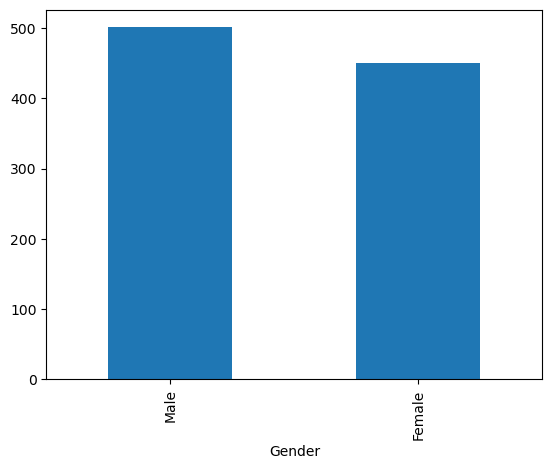

In [318]:
df1['Gender'].value_counts().plot(kind='bar')

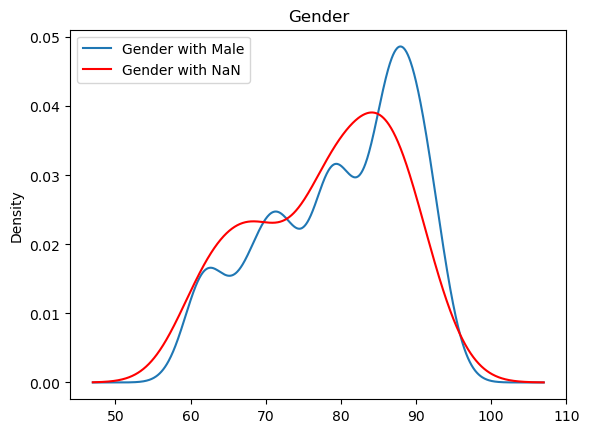

In [319]:
fig=plt.figure()
ax=fig.add_subplot(111)
df1[df1['Gender']=='Male']['FinalGrade'].plot(kind='kde',ax=ax)
df1[df1['Gender'].isnull()]['FinalGrade'].plot(kind='kde',ax=ax,color='red')
lines , labels = ax.get_legend_handles_labels()
labels = ['Gender with Male','Gender with NaN']
ax.legend(lines,labels)
plt.title('Gender')
plt.show()

In [320]:
df1['Gender'] = df1['Gender'].fillna('Male')

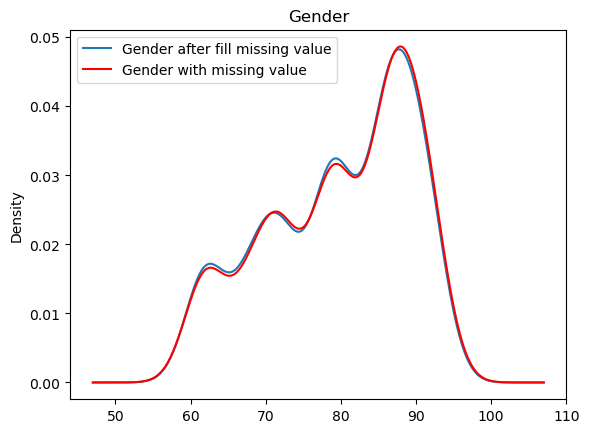

In [321]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1[df1['Gender']=='Male']['FinalGrade'].plot(kind='kde',ax=ax)
df[df['Gender']=='Male']['FinalGrade'].plot(kind='kde',ax = ax,color='red')
lines , labels = ax.get_legend_handles_labels()
labels = ['Gender after fill missing value','Gender with missing value']
ax.legend(lines,labels)
plt.title('Gender')
plt.show()

In [322]:
import seaborn as sns

<Axes: >

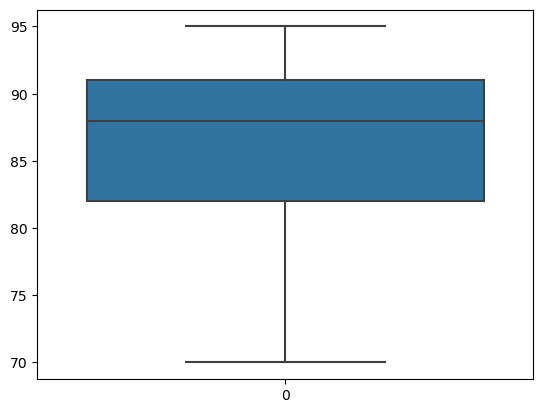

In [323]:
sns.boxplot(df1['AttendanceRate'])

In [324]:
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_25748\139988061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['AttendanceRate'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_25748\139988061.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

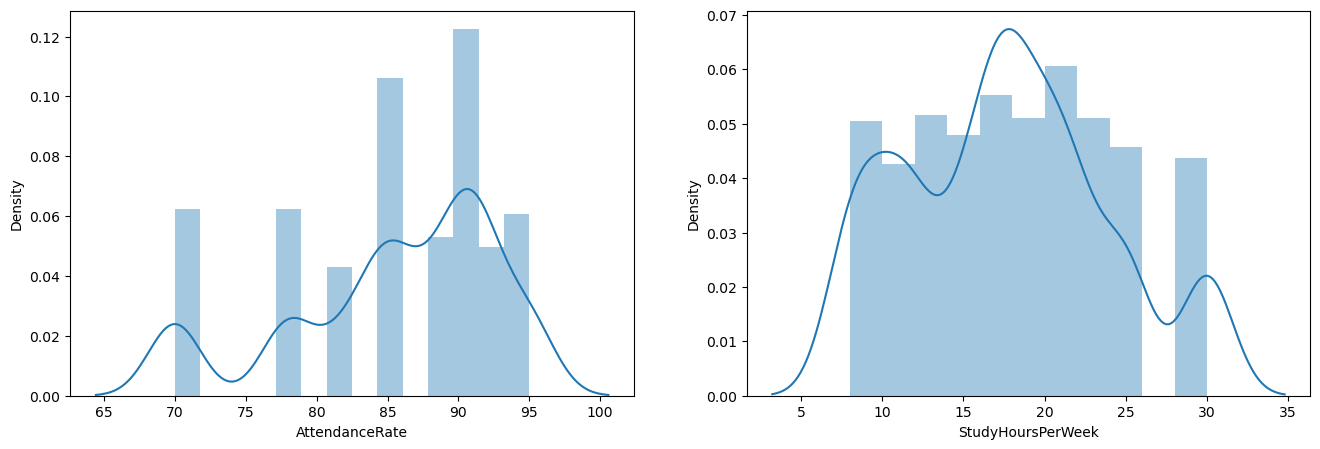

In [325]:

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df1['AttendanceRate'])
plt.subplot(122)
sns.distplot(df1['StudyHoursPerWeek'])
plt.show()

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_25748\3648940293.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['PreviousGrade'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_25748\3648940293.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-l

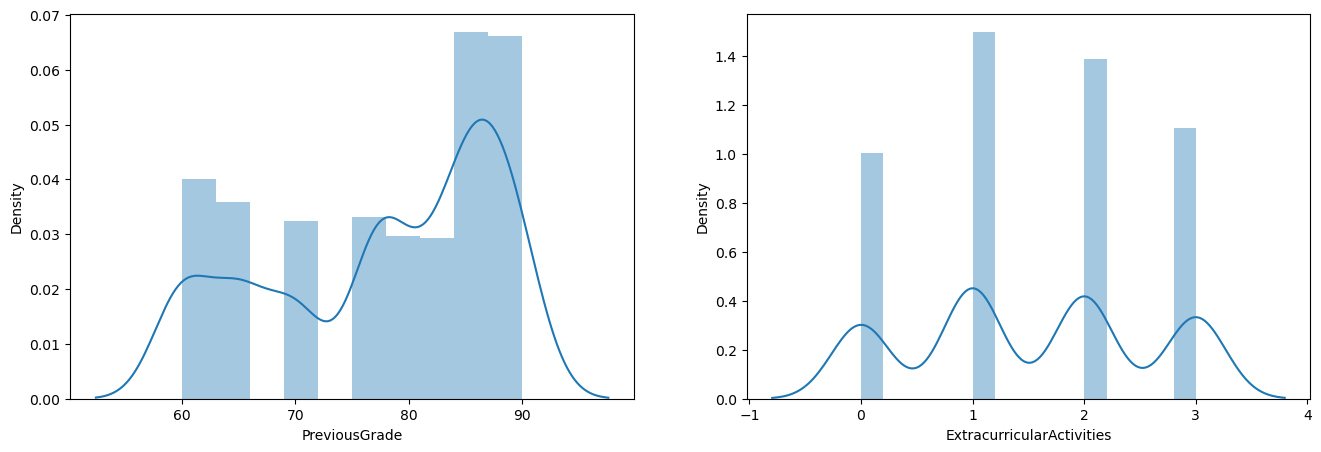

In [326]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df1['PreviousGrade'])
plt.subplot(122)
sns.distplot(df1['ExtracurricularActivities'])
plt.show()

C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_25748\3997201583.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Study Hours'])
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\AppData\Local\Temp\ipykernel_25748\3997201583.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-lev

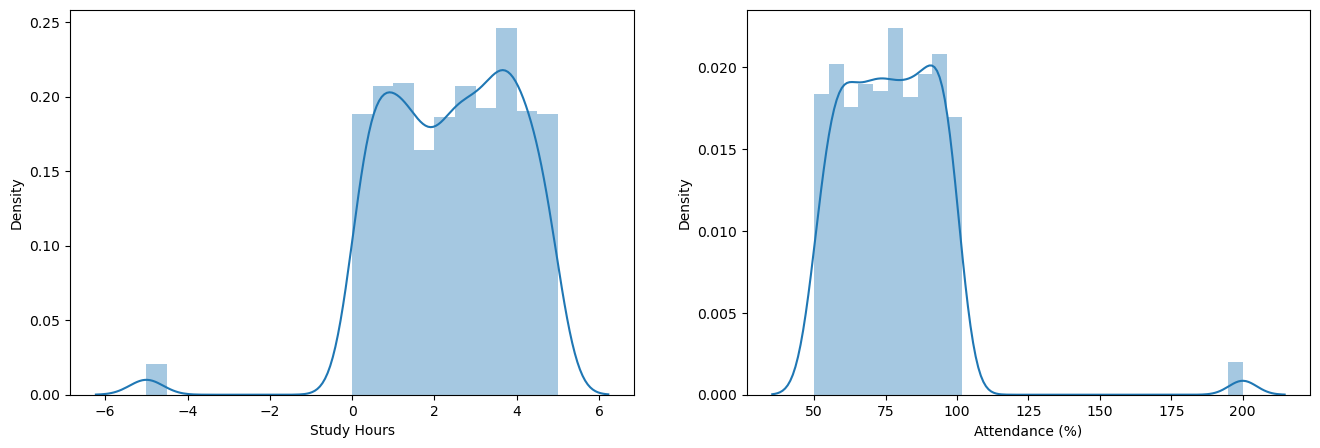

In [327]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df1['Study Hours'])
plt.subplot(122)
sns.distplot(df1['Attendance (%)'])
plt.show()

In [328]:
## here we don't use for filling by neither mean nor median .we will use knn imputer

In [329]:
from sklearn.impute import KNNImputer

In [330]:
impute = KNNImputer(n_neighbors=10)

In [331]:
df1[['Attendance (%)','StudyHoursPerWeek','AttendanceRate','ExtracurricularActivities','PreviousGrade','Study Hours','FinalGrade']] = impute.fit_transform(df1[['Attendance (%)','StudyHoursPerWeek','AttendanceRate','ExtracurricularActivities','PreviousGrade','Study Hours','FinalGrade']])

In [332]:
df1

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,Female,84.0,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
...,...,...,...,...,...,...,...,...,...,...
995,Male,85.0,20.0,77.4,1.0,High,72.0,0.8,80.0,True
996,Female,91.0,19.4,86.0,0.0,High,90.0,3.9,80.0,True
997,Male,85.0,8.0,82.0,2.0,Low,68.0,0.4,54.0,False
998,Male,88.0,17.0,60.0,2.0,High,85.0,0.9,53.0,True


<Axes: xlabel='ParentalSupport'>

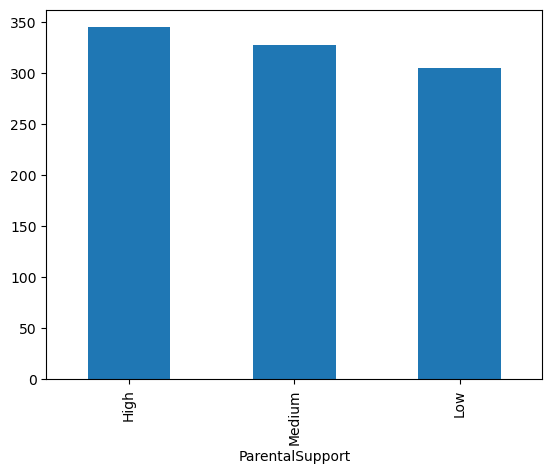

In [333]:
df1['ParentalSupport'].value_counts().plot(kind='bar')

In [334]:
df1['ParentalSupport'] = df1['ParentalSupport'].fillna('High')

<Axes: xlabel='Online Classes Taken'>

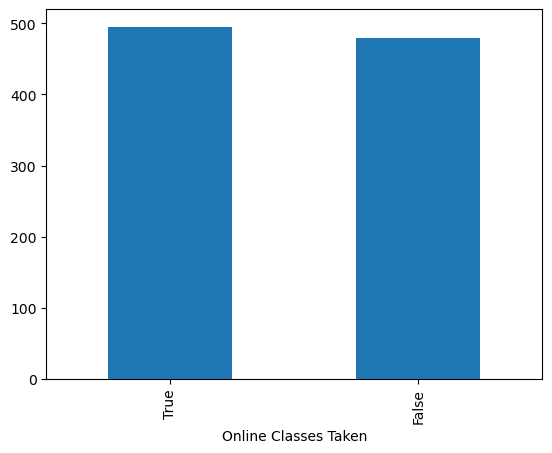

In [335]:
df1['Online Classes Taken'].value_counts().plot(kind='bar')

In [336]:
df1['Online Classes Taken'] = df1['Online Classes Taken'].fillna('True')

In [337]:
df1.isnull().sum()

Gender                       0
AttendanceRate               0
StudyHoursPerWeek            0
PreviousGrade                0
ExtracurricularActivities    0
ParentalSupport              0
FinalGrade                   0
Study Hours                  0
Attendance (%)               0
Online Classes Taken         0
dtype: int64

In [338]:
df1.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,Female,84.0,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

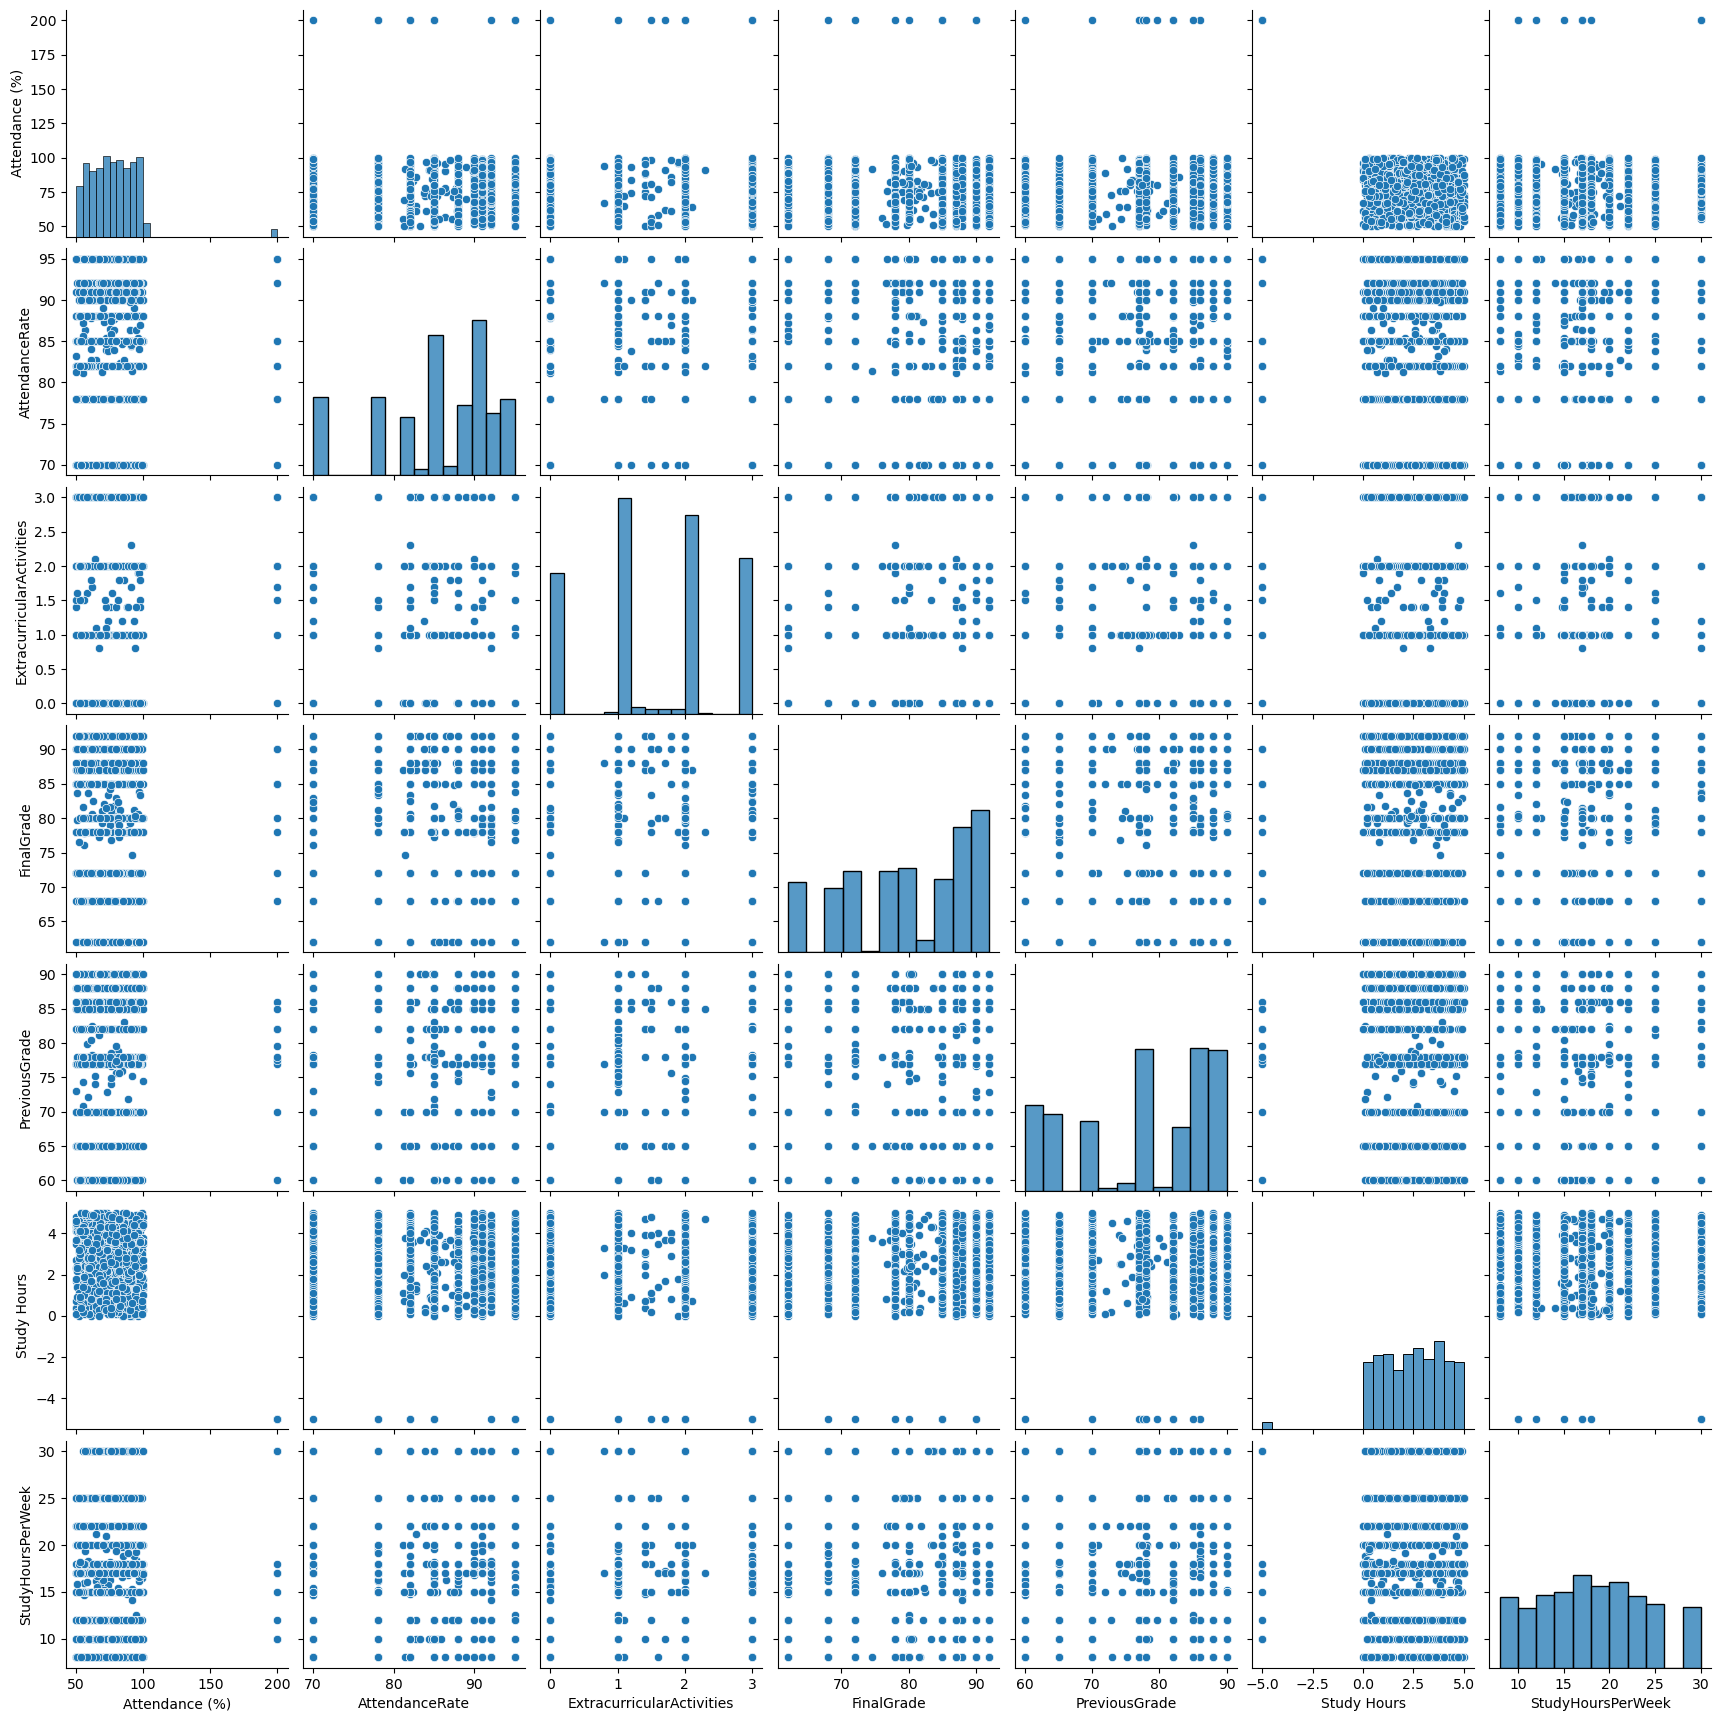

In [339]:
sns.pairplot(df1[['Attendance (%)','AttendanceRate','ExtracurricularActivities','FinalGrade','PreviousGrade','Study Hours','StudyHoursPerWeek']])

In [340]:
bins = [0,39,49,59,69,79,89,100]
labels = ['F','D','C','B','B+','A','A+']
df1['FinalGrade'] = pd.cut(df1['FinalGrade'],bins=bins,labels=labels)

In [341]:
df1

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,Male,85.0,15.0,78.0,1.0,High,A,4.8,59.0,False
1,Female,90.0,20.0,85.0,2.0,Medium,A,2.2,70.0,True
2,Male,78.0,10.0,65.0,0.0,Low,B,4.6,92.0,False
3,Male,92.0,25.0,90.0,3.0,High,A+,2.9,96.0,False
4,Female,84.0,18.0,82.0,2.0,Medium,A,4.1,97.0,True
...,...,...,...,...,...,...,...,...,...,...
995,Male,85.0,20.0,77.4,1.0,High,B+,0.8,80.0,True
996,Female,91.0,19.4,86.0,0.0,High,A+,3.9,80.0,True
997,Male,85.0,8.0,82.0,2.0,Low,B,0.4,54.0,False
998,Male,88.0,17.0,60.0,2.0,High,A,0.9,53.0,True


In [342]:
df1[['Attendance (%)','AttendanceRate','ExtracurricularActivities','PreviousGrade','Study Hours','StudyHoursPerWeek']].corr()

,Attendance (%),AttendanceRate,ExtracurricularActivities,PreviousGrade,Study Hours,StudyHoursPerWeek
Attendance (%),1.000000,0.014710,0.007010,0.046413,-0.307047,0.056960
AttendanceRate,0.014710,1.000000,-0.017778,0.037310,-0.017418,0.017979
ExtracurricularActivities,0.007010,-0.017778,1.000000,0.062374,-0.047033,0.029466
PreviousGrade,0.046413,0.037310,0.062374,1.000000,-0.034952,-0.007160
Study Hours,-0.307047,-0.017418,-0.047033,-0.034952,1.000000,-0.024965
StudyHoursPerWeek,0.056960,0.017979,0.029466,-0.007160,-0.024965,1.000000


In [343]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [344]:
le = LabelEncoder()

In [345]:
df1['Gender'] = le.fit_transform(df1['Gender'])

In [346]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [347]:
df1['Online Classes Taken'] = df1['Online Classes Taken'].astype(str)

In [348]:
df1['Online Classes Taken'].values

array(['False', 'True', 'False', 'False', 'True', 'False', 'False',
       'True', 'False', 'True', 'True', 'False', 'True', 'False', 'True',
       'False', 'True', 'False', 'False', 'False', 'False', 'True',
       'False', 'True', 'True', 'False', 'False', 'True', 'False',
       'False', 'True', 'False', 'False', 'False', 'True', 'True',
       'False', 'True', 'False', 'True', 'True', 'True', 'True', 'True',
       'True', 'True', 'True', 'False', 'False', 'True', 'False', 'True',
       'False', 'False', 'True', 'True', 'False', 'False', 'False',
       'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True',
       'True', 'False', 'True', 'True', 'True', 'False', 'False', 'False',
       'False', 'False', 'True', 'False', 'False', 'False', 'True',
       'True', 'True', 'False', 'True', 'True', 'False', 'False', 'True',
       'False', 'True', 'False', 'False', 'True', 'True', 'False',
       'False', 'False', 'False', 'True', 'False', 'True', 'False',
       'False'

In [349]:
df1['Online Classes Taken'] =le.fit_transform(df1['Online Classes Taken'])

In [350]:
le.classes_

array(['False', 'True'], dtype=object)

In [351]:
df1.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1,85.0,15.0,78.0,1.0,High,A,4.8,59.0,0
1,0,90.0,20.0,85.0,2.0,Medium,A,2.2,70.0,1
2,1,78.0,10.0,65.0,0.0,Low,B,4.6,92.0,0
3,1,92.0,25.0,90.0,3.0,High,A+,2.9,96.0,0
4,0,84.0,18.0,82.0,2.0,Medium,A,4.1,97.0,1


In [352]:
import numpy as np

In [353]:
np.unique(df1['ParentalSupport'])

array(['High', 'Low', 'Medium'], dtype=object)

In [354]:
np.unique(df1['FinalGrade'])

array(['A', 'A+', 'B', 'B+'], dtype=object)

In [355]:
oe = OrdinalEncoder(categories=[['High', 'Low', 'Medium'],['A', 'A+', 'B', 'B+']])

In [356]:
oe.fit(df1[['ParentalSupport','FinalGrade']])

,categories,"[['High', 'Low', ...], ['A', 'A+', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [357]:
df1[['ParentalSupport','FinalGrade']] = oe.transform(df1[['ParentalSupport','FinalGrade']])

In [358]:
df1.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1,85.0,15.0,78.0,1.0,0.0,0.0,4.8,59.0,0
1,0,90.0,20.0,85.0,2.0,2.0,0.0,2.2,70.0,1
2,1,78.0,10.0,65.0,0.0,1.0,2.0,4.6,92.0,0
3,1,92.0,25.0,90.0,3.0,0.0,1.0,2.9,96.0,0
4,0,84.0,18.0,82.0,2.0,2.0,0.0,4.1,97.0,1


In [359]:
df2 = df1.copy()

In [360]:
df2.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1,85.0,15.0,78.0,1.0,0.0,0.0,4.8,59.0,0
1,0,90.0,20.0,85.0,2.0,2.0,0.0,2.2,70.0,1
2,1,78.0,10.0,65.0,0.0,1.0,2.0,4.6,92.0,0
3,1,92.0,25.0,90.0,3.0,0.0,1.0,2.9,96.0,0
4,0,84.0,18.0,82.0,2.0,2.0,0.0,4.1,97.0,1


In [361]:
from sklearn.preprocessing import StandardScaler

In [362]:
scaler = StandardScaler()

In [363]:
scaler.fit(df1[['AttendanceRate','StudyHoursPerWeek','PreviousGrade','ExtracurricularActivities','Study Hours','Attendance (%)']])

,copy,True
,with_mean,True
,with_std,True


In [364]:
df1[['AttendanceRate','StudyHoursPerWeek','PreviousGrade','ExtracurricularActivities','Study Hours','Attendance (%)']] = scaler.transform(df1[['AttendanceRate','StudyHoursPerWeek','PreviousGrade','ExtracurricularActivities','Study Hours','Attendance (%)']])

In [365]:
df1.head()

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1,-0.069452,-0.425770,0.043761,-0.507812,0.0,0.0,1.493491,-0.962284,0
1,0,0.625487,0.390726,0.754334,0.467249,2.0,0.0,-0.130752,-0.380642,1
2,1,-1.042368,-1.242266,-1.275874,-1.482873,1.0,2.0,1.368549,0.782641,0
3,1,0.903463,1.207222,1.261886,1.442311,0.0,1.0,0.306545,0.994148,0
4,0,-0.208440,0.064128,0.449803,0.467249,2.0,0.0,1.056195,1.047024,1


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

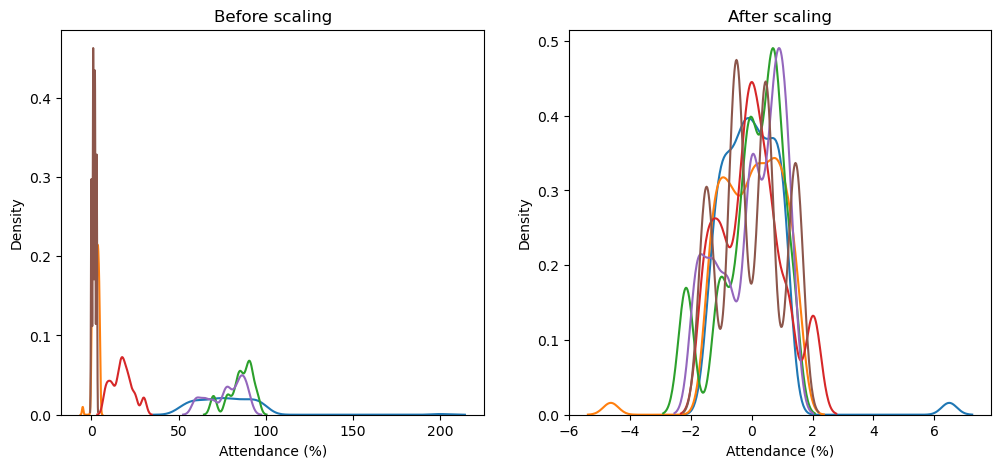

In [366]:
fig , (ax1,ax2)=plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title('Before scaling')
sns.kdeplot(df2['Attendance (%)'],ax=ax1)
sns.kdeplot(df2['Study Hours'],ax=ax1)
sns.kdeplot(df2['AttendanceRate'],ax=ax1)
sns.kdeplot(df2['StudyHoursPerWeek'],ax = ax1)
sns.kdeplot(df2['PreviousGrade'],ax = ax1)
sns.kdeplot(df2['ExtracurricularActivities'],ax = ax1)

ax2.set_title('After scaling')
sns.kdeplot(df1['Attendance (%)'],ax=ax2)
sns.kdeplot(df1['Study Hours'],ax=ax2)
sns.kdeplot(df1['AttendanceRate'],ax=ax2)
sns.kdeplot(df1['StudyHoursPerWeek'],ax = ax2)
sns.kdeplot(df1['PreviousGrade'],ax = ax2)
sns.kdeplot(df1['ExtracurricularActivities'],ax = ax2)

plt.show()

In [367]:
from sklearn.model_selection import train_test_split

In [368]:
x = df1.drop(['FinalGrade'],axis=1)

In [369]:
y = df1['FinalGrade'].values

In [370]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [371]:
from sklearn.neighbors import KNeighborsClassifier

In [372]:
from sklearn.metrics import mean_absolute_error

In [378]:
mae = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    mae.append(mean_absolute_error(y_pred,y_test))

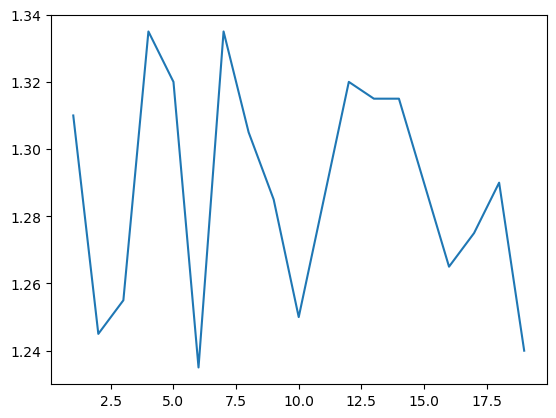

In [379]:
plt.plot(range(1,20),mae)

In [380]:
knn = KNeighborsClassifier(n_neighbors=6)

In [381]:
knn.fit(x_train,y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [382]:
y_pred = knn.predict(x_test)

In [383]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [384]:
accuracy_score(y_test,y_pred)

0.345

In [385]:
mean_absolute_error(y_test,y_pred)

1.235

Text(50.722222222222214, 0.5, 'Actual Values')

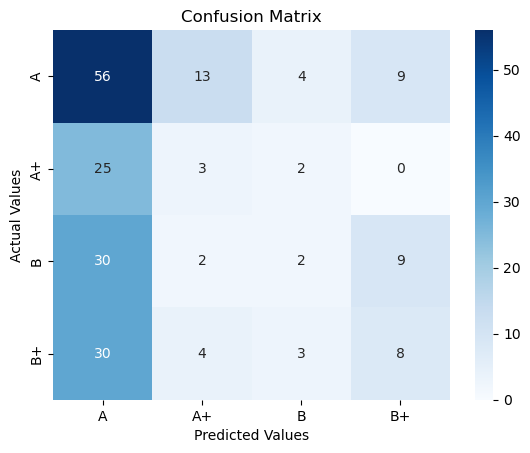

In [388]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,cmap='Blues',annot=True,xticklabels=['A', 'A+', 'B', 'B+'],yticklabels=['A', 'A+', 'B', 'B+'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [389]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.40      0.68      0.50        82
         1.0       0.14      0.10      0.12        30
         2.0       0.18      0.05      0.07        43
         3.0       0.31      0.18      0.23        45

    accuracy                           0.34       200
   macro avg       0.26      0.25      0.23       200
weighted avg       0.29      0.34      0.29       200

